In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plot_fun import subplot_results
from utilities.matrix_calc import Jcb, calc_basis_matrix

### Settings

In [4]:
N = 4 # runs
Kx = [[16]] # Step
Kb = [[2]] # Polynomial
epochs = 100
lvls = [-1, 1]
J_cb = Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip(Kx[0], Kb[0])])
s_on_f_model = ScalarOnFunctionModel(J_cb=J_cb)

### Continuous

In [8]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)

100%|██████████| 100/100 [00:04<00:00, 23.99it/s]


Best objective value (A): 8.43


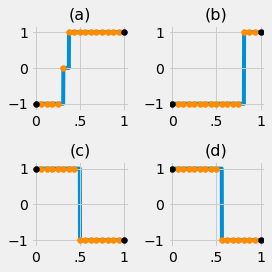

In [9]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### Discrete

In [5]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100, levels=lvls)

100%|██████████| 100/100 [00:00<00:00, 161.78it/s]


Best objective value (A): 8.45


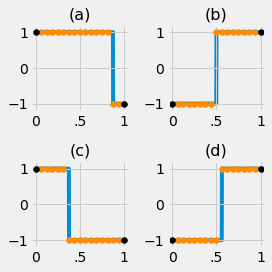

In [5]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')